## import necessary libraries

In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import scale

## reading data

In [2]:
df = pd.read_csv('/content/transcripts.csv', encoding='utf_8')

## Performing feature extraction

In [ ]:
voice_features = []
origin_path = '/content/drive/MyDrive/datasets/ml/final_project/dataset/voices/'
# Generate a Mel spectrogram
n_fft = 4096 # Number of samples per Fourier transform
hop_length = 1024 # Number of samples between successive frames
n_mels = 512 # Number of Mel bands

for voice_path in tqdm(df['voice_filename']):
  path = origin_path+voice_path
  signal, sample_rate = librosa.load(path, sr=None)
  #taking short term fourier transform from the voice
  signal, _ = librosa.effects.trim(signal)

  spectrogram = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
  spectrogram = np.abs(spectrogram)

  # Create Mel filter bank
  mel_filter = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=n_mels)

  mel_spectrogram = np.dot(mel_filter, spectrogram)

  # Convert to log scale
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
  mfccs = librosa.feature.mfcc(S=log_mel_spectrogram, n_mfcc=13)
  voice_features.append(mfccs)

## Saving extracted features back in dataframe

In [ ]:
df = df.drop('voice_filename', axis=1)
df['features'] = voice_features
df.to_pickle('/content/drive/MyDrive/datasets/ml/final_project/dataset/features_new.csv', protocol=5)


## Sample output

In [22]:
origin_path = '/content/drive/MyDrive/datasets/ml/final_project/dataset/voices/'
# Generate a Mel spectrogram
n_fft = 4096 # Number of samples per Fourier transform
hop_length = 1024 # Number of samples between successive frames
n_mels = 512 # Number of Mel bands
path = origin_path+df['voice_filename'][0]
signal, sample_rate = librosa.load(path, sr=None)
#taking short term fourier transform from the voice
signal, _ = librosa.effects.trim(signal)

spectrogram = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(spectrogram)

# Create Mel filter bank
mel_filter = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=n_mels)

mel_spectrogram = np.dot(mel_filter, spectrogram)

# Convert to log scale
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
mfccs = librosa.feature.mfcc(S=log_mel_spectrogram, n_mfcc=13)

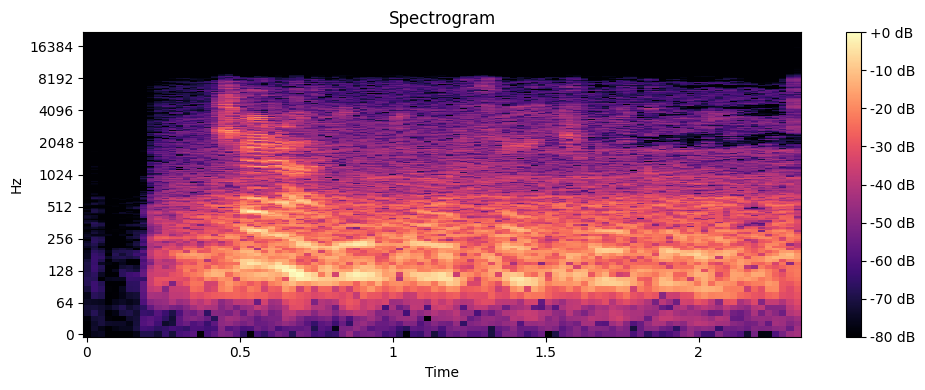

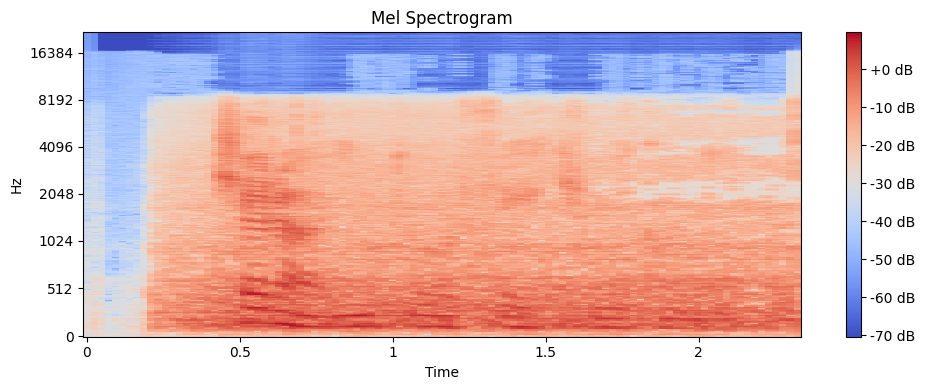

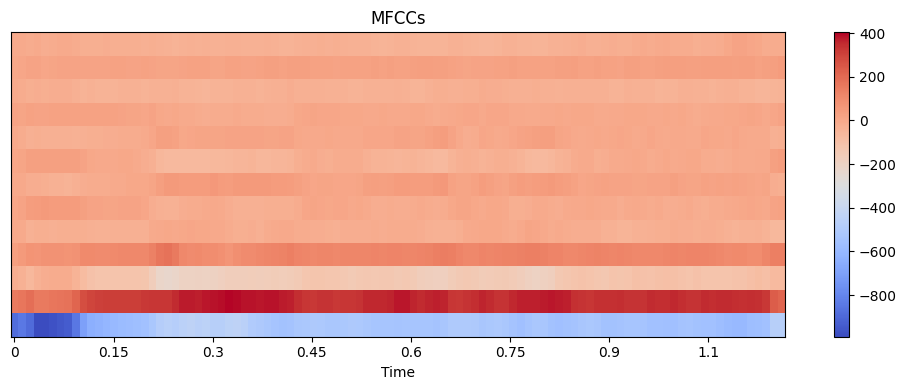

In [23]:
# Visualize Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()

# Visualize Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()

# Visualize MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()
